### Тестовое задание от 04.09.23г.
#### Федотова Алина

- На листе Data представлены данные по розничным продажам и селлаутам. Селлаут определяется формулой Sales Cost EUR/Order EUR
- На листе Markups представлены данные по маркапам. Маркап определяется формулой Retail EUR/Sales Cost EUR

#### Задачи:
 
- Рассчитать и представить в наглядном формате суммы заказов (Order EUR) по каждому бренду в разрезе пола.
- Показать в наглядном формате бренды по убыванию средней розничной цены за единицу товара.
- Проанализировать данные, выявить наиболее важные инсайты и представить в наглядном формате.

In [4]:
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
data    = pd.read_csv('ТЗ_2.csv', sep=';', encoding='utf-8')
markups = pd.read_csv('ТЗ_3.csv', sep=';', encoding='utf-8')

#### Ознакомимся с таблицами

In [3]:
data.head()

,_ktm1,_brand,_ktt1,_ktt2,_year,_month,_retail_PCs,_retail_EUR,Sellout
0,TSUM,Brand 1,Товары для мужчин,Аксессуары,2019 год,Апрель 2019 года,3,"454,0591",50%
1,TSUM,Brand 1,Товары для женщин,Аксессуары,2019 год,Апрель 2019 года,1,"385,7781",100%
2,TSUM,Brand 1,Товары для женщин,Аксессуары из кожи,2018 год,Апрель 2018 года,53,"24657,7326",51%
3,TSUM,Brand 1,Товары для женщин,Аксессуары из кожи,2019 год,Апрель 2019 года,23,"9335,8751",51%
4,TSUM,Brand 1,Товары для мужчин,Аксессуары из кожи,2019 год,Апрель 2019 года,2,"640,1196",67%


In [4]:
markups.head()

,_brand,_ktt1,_ktt2,Markup
0,Brand 1,Товары для мужчин,Аксессуары,"2,73"
1,Brand 1,Товары для женщин,Аксессуары,"3,57"
2,Brand 1,Товары для женщин,Аксессуары из кожи,"3,39"
3,Brand 1,Товары для мужчин,Аксессуары из кожи,"3,54"
4,Brand 1,Товары для женщин,Бижутерия,"2,67"


#### Проверим тип данных и пропущенные значения

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _ktm1        339 non-null    object
 1   _brand       339 non-null    object
 2   _ktt1        339 non-null    object
 3   _ktt2        339 non-null    object
 4   _year        339 non-null    object
 5   _month       339 non-null    object
 6   _retail_PCs  339 non-null    int64 
 7   _retail_EUR  339 non-null    object
 8   Sellout      339 non-null    object
dtypes: int64(1), object(8)
memory usage: 24.0+ KB


In [6]:
markups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   _brand  72 non-null     object
 1   _ktt1   72 non-null     object
 2   _ktt2   72 non-null     object
 3   Markup  71 non-null     object
dtypes: object(4)
memory usage: 2.4+ KB


#### Заменим тип данных  в колонках Markup, _retail_EUR с object на float

In [7]:
percent_column      = data['_retail_EUR'].astype(str)
percent_column      = percent_column.str.replace(',', '.')
percent_column      = percent_column.astype(float)
data['_retail_EUR'] = percent_column

In [8]:
percent_column      = markups['Markup'].astype(str)
percent_column      = percent_column.str.replace(',', '.')
percent_column      = percent_column.astype(float)
markups['Markup']   = percent_column

#### Заменим знак процента на значение в поле на int для удобства вычислений

In [9]:
percent_column  = data['Sellout'].astype(str)
percent_column  = percent_column.str.replace('%', '')
percent_column  = percent_column.astype(int)
data['Sellout'] = percent_column

#### Объединим две таблицы по общим колонкам

In [10]:
merged = pd.merge(data, markups, on = ['_brand', '_ktt1', '_ktt2'])

In [11]:
merged.head()

,_ktm1,_brand,_ktt1,_ktt2,_year,_month,_retail_PCs,_retail_EUR,Sellout,Markup
0,TSUM,Brand 1,Товары для мужчин,Аксессуары,2019 год,Апрель 2019 года,3,454.0591,50,2.73
1,Boutiques,Brand 1,Товары для мужчин,Аксессуары,2019 год,Апрель 2019 года,3,436.2037,60,2.73
2,TSUM,Brand 1,Товары для женщин,Аксессуары,2019 год,Апрель 2019 года,1,385.7781,100,3.57
3,Boutiques,Brand 1,Товары для женщин,Аксессуары,2018 год,Апрель 2018 года,17,3737.5577,68,3.57
4,TSUM,Brand 1,Товары для женщин,Аксессуары из кожи,2018 год,Апрель 2018 года,53,24657.7326,51,3.39


### Задание #1
Рассчитаем сумму заказов Order EUR и добавим в таблицу merged

In [12]:
# расчет суммы заказов по формуле: Order EUR = Sales Cost EUR * Markup
merged['Order_EUR'] = (merged['_retail_EUR'] / merged['Markup']).round(3)
merged.head()

,_ktm1,_brand,_ktt1,_ktt2,_year,_month,_retail_PCs,_retail_EUR,Sellout,Markup,Order_EUR
0,TSUM,Brand 1,Товары для мужчин,Аксессуары,2019 год,Апрель 2019 года,3,454.0591,50,2.73,166.322
1,Boutiques,Brand 1,Товары для мужчин,Аксессуары,2019 год,Апрель 2019 года,3,436.2037,60,2.73,159.782
2,TSUM,Brand 1,Товары для женщин,Аксессуары,2019 год,Апрель 2019 года,1,385.7781,100,3.57,108.061
3,Boutiques,Brand 1,Товары для женщин,Аксессуары,2018 год,Апрель 2018 года,17,3737.5577,68,3.57,1046.935
4,TSUM,Brand 1,Товары для женщин,Аксессуары из кожи,2018 год,Апрель 2018 года,53,24657.7326,51,3.39,7273.667


#### Сгруппируем данные по бренду и полу и расчет суммы заказов

In [13]:
order_sum_df = merged \
    .groupby(['_brand', '_ktt1'], as_index=False) \
    .agg({'Order_EUR': 'sum'}) \
    .reset_index()


order_sum_by_gender_df = pd.pivot_table(merged, values='Order_EUR', index='_brand', columns='_ktt1', aggfunc=sum)
order_sum_by_gender_df

_ktt1,Товары для детей,Товары для женщин,Товары для мужчин
_brand,,,
Brand 1,NaN,651988.207,3262.329
Brand 2,335045.757,2026908.711,1550943.603
Brand 3,NaN,180608.557,86845.207
Brand 4,NaN,1453539.204,81380.139
Brand 5,60.530,NaN,219599.375
Brand 6,NaN,NaN,851169.252


### Задание #2
Рассчитаем среднюю розничную цену за единицу товара и выведем бренды в наглядном формате по убыванию средней цены

In [14]:
merged['retail_price_per_unit'] = (merged['_retail_EUR'] / merged['_retail_PCs']).round(3)

In [15]:
mean_retail_price = merged \
    .groupby(['_brand'], as_index=False) \
    .agg({'retail_price_per_unit': 'mean'}) \
    .sort_values('retail_price_per_unit', ascending=False)\
    .round(3)
mean_retail_price

,_brand,retail_price_per_unit
0,Brand 1,845.056
3,Brand 4,687.833
1,Brand 2,426.159
5,Brand 6,403.134
2,Brand 3,370.597
4,Brand 5,182.359


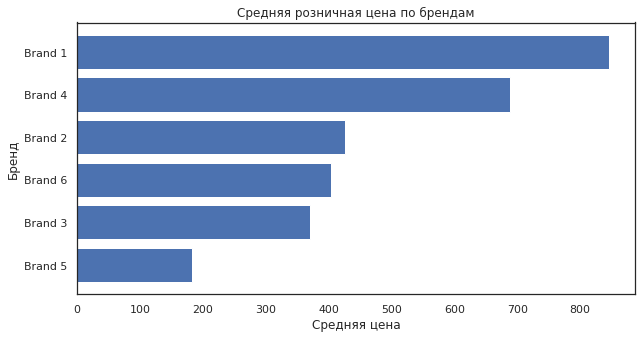

In [25]:
plt.figure(figsize=(10, 5))
plt.barh(mean_retail_price['_brand'], mean_retail_price['retail_price_per_unit'])

# заголовок и подписи осей координат
plt.title('Средняя розничная цена по брендам')
plt.xlabel('Средняя цена')
plt.ylabel('Бренд')

# работа с осью Y, чтобы бары были отсортированы по убыванию
plt.gca().invert_yaxis()

plt.show()

In [16]:
merged.head()

,_ktm1,_brand,_ktt1,_ktt2,_year,_month,_retail_PCs,_retail_EUR,Sellout,Markup,Order_EUR,retail_price_per_unit
0,TSUM,Brand 1,Товары для мужчин,Аксессуары,2019 год,Апрель 2019 года,3,454.0591,50,2.73,166.322,151.353
1,Boutiques,Brand 1,Товары для мужчин,Аксессуары,2019 год,Апрель 2019 года,3,436.2037,60,2.73,159.782,145.401
2,TSUM,Brand 1,Товары для женщин,Аксессуары,2019 год,Апрель 2019 года,1,385.7781,100,3.57,108.061,385.778
3,Boutiques,Brand 1,Товары для женщин,Аксессуары,2018 год,Апрель 2018 года,17,3737.5577,68,3.57,1046.935,219.856
4,TSUM,Brand 1,Товары для женщин,Аксессуары из кожи,2018 год,Апрель 2018 года,53,24657.7326,51,3.39,7273.667,465.240


### Задание #3
Проанализируем данные, выявим наиболее важные инсайты и представим в наглядном формате

#### Найдем бренды с наибольшим и наименьшим количеством продаж

In [17]:
sales_by_brand = merged \
    .groupby('_brand')['Order_EUR'].sum() \
    .sort_values(ascending=False) \
    .reset_index()

sales_by_brand

,_brand,Order_EUR
0,Brand 2,3912898.071
1,Brand 4,1534919.343
2,Brand 6,851169.252
3,Brand 1,655250.536
4,Brand 3,267453.764
5,Brand 5,219659.905


#### Построим график для наглядности

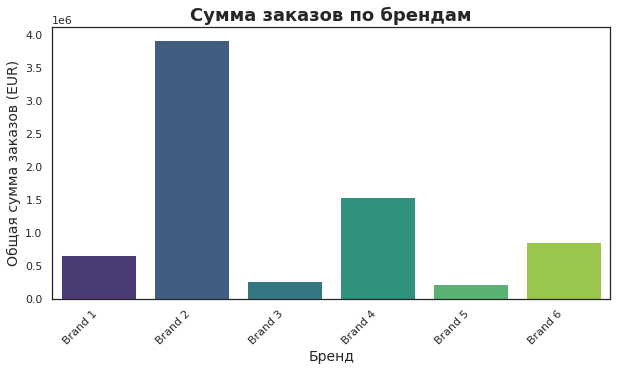

In [18]:
sns.set(style="white")

brand_data = merged.groupby(['_brand'])['Order_EUR'].sum().reset_index()
fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x='_brand', 
            y='Order_EUR', 
            data=brand_data, 
            palette='viridis', 
            ax=ax)

# добавим подписи, заголовок и настройки осей
ax.set_title('Сумма заказов по брендам', fontweight='bold', fontsize=18)
ax.set_xlabel('Бренд', fontsize=14)
ax.set_ylabel('Общая сумма заказов (EUR)', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()

In [19]:
most_sold_brands = sales_by_brand.nlargest(5, 'Order_EUR')
most_sold_brands

,_brand,Order_EUR
0,Brand 2,3912898.071
1,Brand 4,1534919.343
2,Brand 6,851169.252
3,Brand 1,655250.536
4,Brand 3,267453.764


In [20]:
least_sold_brands = sales_by_brand.nsmallest(5, 'Order_EUR')
least_sold_brands

,_brand,Order_EUR
5,Brand 5,219659.905
4,Brand 3,267453.764
3,Brand 1,655250.536
2,Brand 6,851169.252
1,Brand 4,1534919.343


In [21]:
sales_by_ktt2 = merged \
    .groupby('_ktt2')['Order_EUR'].sum() \
    .sort_values(ascending=False) \
    .reset_index()

sales_by_ktt2

,_ktt2,Order_EUR
0,Одежда,4163580.004
1,Сумки,1282848.003
2,Обувь,1128059.024
3,"Домашняя, пляжная одежда",233202.739
4,Аксессуары из кожи,165886.380
5,Товары для девочек,156641.293
6,Товары для мальчиков,123944.947
7,Аксессуары,95921.712
8,Бижутерия,50590.084
9,Товары для новорожденных,39483.794


#### Сгруппирем результаты по категории товара и месяцу, а затем отсортируем по количеству продаж

In [22]:
sales_by_ktt2_month = merged \
    .groupby(['_ktt2', '_month'])['Order_EUR'].sum()\
    .sort_values(ascending=False) \
    .reset_index()

sales_by_ktt2_month

,_ktt2,_month,Order_EUR
0,Одежда,Апрель 2019 года,2177016.653
1,Одежда,Апрель 2018 года,1986563.351
2,Сумки,Апрель 2019 года,720340.830
3,Обувь,Апрель 2019 года,580704.982
4,Сумки,Апрель 2018 года,562507.173
5,Обувь,Апрель 2018 года,547354.042
6,"Домашняя, пляжная одежда",Апрель 2019 года,127901.705
7,"Домашняя, пляжная одежда",Апрель 2018 года,105301.034
8,Товары для девочек,Апрель 2019 года,94127.474
9,Аксессуары из кожи,Апрель 2019 года,83775.402


#### Наблюдения:
Можно заметить, что категория "Одежда" была наиболее продаваемой в обоих годах, причем в 2019 году продажи этой категории были значительно выше, чем в 2018 году. Подобная тенденция наблюдается и в других категориях товаров.

На основе этих данных можно дать следующие рекомендации:

- Учитывая значительный рост продаж в категории "Одежда" в 2019 году, возможно, стоит увеличить инвестиции в эту категорию товаров

- Категории "Сумки" и "Обувь" также являются популярными и занимают второе и третье места соответственно. Увеличение количества продаж в этих категориях может привести к увеличению общих продаж

- Категории "Домашняя, пляжная одежда" и "Товары для детей" показывают значительный потенциал роста, поскольку в них наблюдается высокий рост продаж по сравнению с предыдущим годом

- Некоторые категории товаров, такие как "Игрушки, Предметы интерьера" и "Канцелярские товары", не имеют большого количества продаж и могут потребовать дополнительной рекламы или маркетинговых кампаний, чтобы привлечь новых покупателей, возможно, стоить проанализировать как предстаавлен товар на полках магазинов

А так же, 
- Расширение ассортимента для Бренда 1, Бренда 3, Бренда 4 и Бренда 6 не предоставлены товары в категории "Товары для детей". Добавление товаров в детскую категорию может помочь увеличить продажи и привлечь еще больше покупателей, так как многие люди нацелены покупать сразу и себе и детям в одном месте. Естественно, если у данных брендов есть детские коллекции.

- Увеличить фокус на женскую аудиторию для Бренда 5 в категории "Товары для женщин". Исследование товаров и добавление товаров рассчитанных на женскую аудиторию, возможно, может помочь в увеличении общей выручки, тут имеет смысл более точечно взаимодействовать с женской ааудиторией для того, чтоб понять предпочтения.

- Анализ продажи товаров для мужчин: Бренд 1 имеет наименьшую выручку в категории "Товары для мужчин". Хорошим вариантом будет исследовать спрос на товары этого бренда в данной категории, улучшить маркетинговые стратегии и, возможно, расширить предложения, иначе, подумать над тем, есть ли необходимость "держать" данный бренд, особенно, если он занимает большую площадь для продаж в магазинах.